In [1]:
import numpy as np
import tensorflow as tf
import keras
import keras.datasets.mnist as mnist 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
np.random.seed(404)

In [2]:
(xTrain,yTrain),(xTest,yTest)=mnist.load_data()
print('features train shape:',xTrain.shape)
print('labels train shape  :',yTrain.shape)
print('features test shape :',xTest.shape)
print('labels test shape   :',yTest.shape)

features train shape: (60000, 28, 28)
labels train shape  : (60000,)
features test shape : (10000, 28, 28)
labels test shape   : (10000,)


In [3]:
def showMNIST(xData,yData,n=10):
    nData,_,_ = xData.shape
    ind = np.random.randint(0,nData-1,n)
    plt.figure(figsize=(20,4))
    print('Number image')
    for ii,jj in enumerate(ind):
        
        ax = plt.subplot(1,n,ii+1)
        plt.imshow(xData[jj].reshape(28,28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
    print('Number labels')
    print(yData[ind])
#     print(ind)

Number image


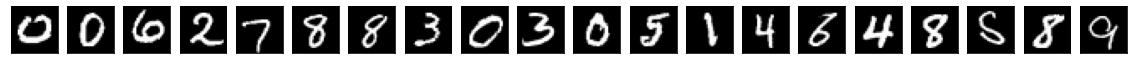

Number labels
[0 0 6 2 7 8 8 3 0 3 0 5 1 4 6 4 8 5 8 9]


In [4]:
showMNIST(xTrain,yTrain,20)

Number image


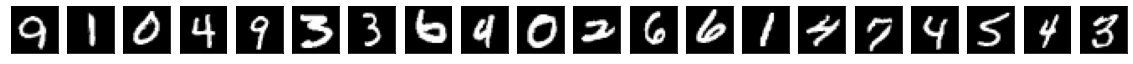

Number labels
[9 1 0 4 9 3 3 6 4 0 2 6 6 1 4 7 4 5 4 3]


In [5]:
showMNIST(xTest,yTest,20)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Dropout,MaxPooling2D,Flatten
from sklearn.metrics import confusion_matrix,accuracy_score


In [7]:
model = Sequential()
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(198,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(265,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 198)         228294    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 198)         0         
_________________________________________________________________
flatten (Flatten)            (None, 198)               0

In [8]:
xTrain = xTrain.reshape(xTrain.shape[0],xTrain.shape[1],xTrain.shape[2],1)
xTest = xTest.reshape(xTest.shape[0],xTest.shape[1],xTest.shape[2],1)
print(xTrain.shape)
print(xTest.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [9]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [10]:
history = model.fit(xTrain,yTrain, epochs = 10,verbose=1)

Epoch 1/10
1875/1875 [==============================] - 39s 20ms/step - loss: 0.8735 - accuracy: 0.8736
Epoch 2/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.3681 - accuracy: 0.9050
Epoch 3/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.3502 - accuracy: 0.9079
Epoch 4/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.3816 - accuracy: 0.9006
Epoch 5/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.3847 - accuracy: 0.8994
Epoch 6/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.4178 - accuracy: 0.8859
Epoch 7/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.4149 - accuracy: 0.8826
Epoch 8/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.3921 - accuracy: 0.8857
Epoch 9/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.3655 - accuracy: 0.8936
Epoch 10/10
1875/1875 [==============================] - 43s 23m

In [11]:
yPred = model.predict(xTest)
yPred = np.argmax(yPred,axis=1)
print(accuracy_score(yTest,yPred))

0.9032


<AxesSubplot:>

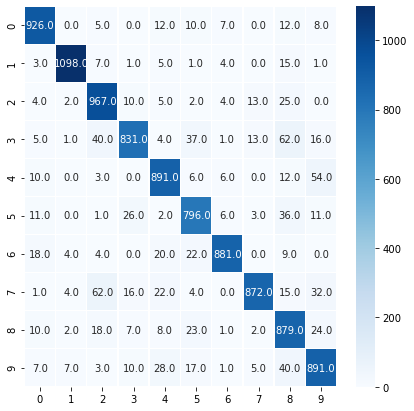

In [12]:
conf_mat = confusion_matrix(yTest,yPred)
f,ax = plt.subplots(figsize=(7, 7))
sns.heatmap(conf_mat, cmap='Blues',annot=True, linewidths=.5, fmt= '.1f',ax=ax)

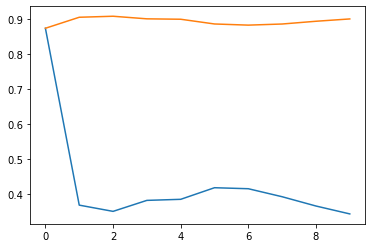

In [13]:
for ii in history.history.keys():
    plt.plot(history.history[ii])
plt.show()